In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumGothic')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
from datetime import datetime
from datetime import timedelta
from pandas import Series, DataFrame
import scipy.stats

In [2]:
age_201902 = pd.read_csv('C:/Users/JIN/Jupyter/Big Con/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201902.csv', sep = '|')
age_201903 = pd.read_csv('C:/Users/JIN/Jupyter/Big Con/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201903.csv', sep = '|')
age_201904 = pd.read_csv('C:/Users/JIN/Jupyter/Big Con/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201904.csv', sep = '|')
age_201905 = pd.read_csv('C:/Users/JIN/Jupyter/Big Con/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201905.csv', sep = '|')

In [300]:
#데이터 적재
age_202002 = pd.read_csv('C:/Users/JIN/Jupyter/Big Con/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202002.csv', sep = '|')
age_202003 = pd.read_csv('C:/Users/JIN/Jupyter/Big Con/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202003.csv', sep = '|')
age_202004 = pd.read_csv('C:/Users/JIN/Jupyter/Big Con/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202004.csv', sep = '|')
age_202005 = pd.read_csv('C:/Users/JIN/Jupyter/Big Con/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202005.csv', sep = '|')

In [326]:
#전체 2020년 데이터로 합쳐주기
age_2019 = pd.concat([age_201902, age_201903, age_201904, age_201905], axis = 0, ignore_index = True)
age_2020 = pd.concat([age_202002, age_202003, age_202004, age_202005], axis = 0, ignore_index = True)

In [331]:
import os
base_dir = "E:/문서/DataCam/팀플"
file_nm = "20년_유동인구.xlsx"
xlxs_dir = os.path.join(base_dir, file_nm) 

In [332]:
age_2020.to_excel(xlxs_dir,
            sheet_name = 'Sheet1', 
            na_rep = 'NaN', 
            float_format = "%.2f", 
            header = True, 
            index = True, 
            index_label = "id", 
            )

In [302]:
#필요 없는 column인 HDONG_CD 삭제
age_2019.drop('HDONG_CD', axis = 1, inplace = True)
age_2020.drop('HDONG_CD', axis = 1, inplace = True)

In [303]:
age_2019.head()

,STD_YM,STD_YMD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201902,20190201,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,14249.35,...,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71
1,201902,20190202,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,7259.61,...,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26
2,201902,20190203,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,5067.98,...,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98
3,201902,20190204,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,4508.23,...,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35
4,201902,20190205,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,5735.30,...,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09


In [304]:
#연월일(STD_YMD)을 date type으로 변환
age_2019['STD_YMD'] = pd.to_datetime(age_2020['STD_YMD'], format = '%Y%m%d')
age_2020['STD_YMD'] = pd.to_datetime(age_2020['STD_YMD'], format = '%Y%m%d')

In [305]:
#연도, 월 column 추가

age_2019['연도'] = age_20['STD_YMD'].apply(lambda X: X.strftime('%Y'))
age_2019['월'] = age_2020['STD_YMD'].apply(lambda X: X.strftime('%m'))

age_2020['연도'] = age_2020['STD_YMD'].apply(lambda X: X.strftime('%Y'))
age_2020['월'] = age_2020['STD_YMD'].apply(lambda X: X.strftime('%m'))

In [306]:
서울_중구 = ['소공동', '회현동', '명동', '필동', '장충동', '광희동', '을지로동', '신당동', '다산동',\
     '약수동', '청구동', '신당5동', '동화동', '황학동', '중림동']
서울_노원구 = ['월계1동', '월계2동', '월계3동', '공릉1동', '공릉2동', '하계1동', '하계2동', '중계본동',\
         '중계1동', '중계4동', '중계2.3동', '상계1동', '상계2동', '상계3.4동', '상계5동', '상계6.7동',\
         '상계8동', '상계9동', '상계10동']
서울특별시 = 서울_중구 + 서울_노원구

In [307]:
대구_중구 = ['동인동', '삼덕동', '성내1동', '성내2동', '성내3동', '대신동', '남산1동', '남산2동', '남산3동', '남산4동',\
         '대봉1동', '대봉2동']
대구_수성구 = ['범어1동', '범어2동', '범어3동', '범어4동', '만촌1동', '만촌2동', '만촌3동', '수성1가동', '수성2.3가동',\
         '수성4가동', '황금1동', '황금2동', '중동', '상동', '파동', '두산동', '지산1동', '지산2동', '범물1동', '범물2동',\
         '고산1동', '고산2동', '고산3동']
대구광역시 = 대구_중구 + 대구_수성구

In [308]:
#도시, 행정구 column 추가
age_2019 = age_2019.assign(CITY_NM = '', GU_NM = '')
age_2020 = age_2020.assign(CITY_NM = '', GU_NM = '')

In [309]:
#행정구를 구별하는 함수
def where_gu(df):
    for i in list(range(len(df))):
        if df['HDONG_NM'][i] in 서울_중구:
            df['GU_NM'][i] = '서울중구'
        elif df['HDONG_NM'][i] in 서울_노원구:
            df['GU_NM'][i] = '노원구'
        elif df['HDONG_NM'][i] in 대구_중구:
            df['GU_NM'][i] = '대구중구'
        elif df['HDONG_NM'][i] in 대구_수성구:
            df['GU_NM'][i] = '수성구'

In [310]:
#도시를 구별하는 함수
def where_city(df):
    for i in list(range(len(df))):
        if df['HDONG_NM'][i] in 서울특별시:
            df['CITY_NM'][i] = '서울특별시'
        else:
            df['CITY_NM'][i] = '대구광역시'

In [311]:
where_gu(age_2019)
where_city(age_2019)

where_gu(age_2020)
where_city(age_2020)

<ipython-input-309-9c800f14a437>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GU_NM'][i] = '서울중구'
<ipython-input-309-9c800f14a437>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GU_NM'][i] = '노원구'
<ipython-input-309-9c800f14a437>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GU_NM'][i] = '대구중구'
<ipython-input-309-9c800f14a437>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [312]:
#column 모두 한국어로 바꾸기
age_2019.columns = ['연월', '연월일', '행정동',\
                    '남_0004', '남_0509', '남_1014', '남_1519',\
                    '남_2024', '남_2529', '남_3034', '남_3539',\
                    '남_4044', '남_4549', '남_5054', '남_5559',\
                    '남_6064', '남_6569', '남_70U',\
                    '여_0004', '여_0509', '여_1014', '여_1519',\
                    '여_2024', '여_2529', '여_3034', '여_3539',\
                    '여_4044', '여_4549', '여_5054', '여_5559',\
                    '여_6064', '여_6569', '여_70U',\
                    '연도', '월', '도시', '행정구']

age_2020.columns = ['연월', '연월일', '행정동',\
                    '남_0004', '남_0509', '남_1014', '남_1519',\
                    '남_2024', '남_2529', '남_3034', '남_3539',\
                    '남_4044', '남_4549', '남_5054', '남_5559',\
                    '남_6064', '남_6569', '남_70U',\
                    '여_0004', '여_0509', '여_1014', '여_1519',\
                    '여_2024', '여_2529', '여_3034', '여_3539',\
                    '여_4044', '여_4549', '여_5054', '여_5559',\
                    '여_6064', '여_6569', '여_70U',\
                    '연도', '월', '도시', '행정구']

In [316]:
#5세 단위로 나뉘어져 있는 연령을 10세 단위로 만들어주기
def age_binning(df):
    df['10대미만'] = df.남_0004 + df.남_0509 + df.여_0004 + df.여_0509
    df['10대'] = df.남_1014 + df.남_1519 + df.여_1014 + df.여_1519
    df['20대'] = df.남_2024 + df.남_2529 + df.여_2024 + df.여_2529
    df['30대'] = df.남_3034 + df.남_3539 + df.여_3034 + df.여_3539
    df['40대'] = df.남_4044 + df.남_4549 + df.여_4044 + df.여_4549
    df['50대'] = df.남_5054 + df.남_5559 + df.여_5054 + df.여_5559
    df['60대'] = df.남_6064 + df.남_6569 + df.여_6064 + df.여_6569
    df['70대이상'] = df.남_70U + df.여_70U
    df['전체'] = df['10대미만'] + df['10대'] + df['20대'] + df['30대'] + df['40대'] + df['50대'] + df['60대'] + df['70대이상']

In [317]:
age_binning(age_2019)

age_binning(age_2020)

In [318]:
age_2019

,연월,연월일,행정동,남_0004,남_0509,남_1014,남_1519,남_2024,남_2529,남_3034,...,행정구,10대미만,10대,20대,30대,40대,50대,60대,70대이상,전체
0,201902,2020-02-01,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,14249.35,...,서울중구,284.24,4599.43,38257.92,55615.29,53401.72,44606.70,31151.00,14314.38,242230.68
1,201902,2020-02-02,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,7259.61,...,서울중구,350.61,5108.77,25727.02,26276.43,22604.52,23096.47,20048.26,10199.91,133411.99
2,201902,2020-02-03,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,5067.98,...,서울중구,282.08,3901.37,17144.44,18189.25,15815.95,15984.44,12865.10,5942.30,90124.93
3,201902,2020-02-04,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,4508.23,...,서울중구,305.29,4334.41,15116.51,16168.42,14735.74,15066.32,12118.11,5533.75,83378.55
4,201902,2020-02-05,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,5735.30,...,서울중구,587.66,7370.20,17379.32,22183.38,22258.69,21011.40,14198.47,6020.35,111009.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,201905,2020-05-20,고산3동,0.00,160.91,604.28,994.41,1305.36,1679.60,1724.78,...,수성구,352.64,3138.66,5606.21,7345.99,11362.88,10869.25,5996.19,2339.66,47011.48
8276,201905,2020-05-21,고산3동,0.00,151.66,617.83,963.84,1291.84,1716.82,1709.87,...,수성구,354.01,3178.87,5620.78,7465.28,11713.91,11381.83,6806.51,2823.55,49344.74
8277,201905,2020-05-22,고산3동,0.00,147.68,675.46,1006.99,1319.99,1721.71,1737.97,...,수성구,390.68,3398.18,5765.73,7546.69,12177.22,11632.31,6716.94,2717.66,50345.41
8278,201905,2020-05-23,고산3동,0.00,150.40,599.51,978.03,1231.77,1783.48,1771.25,...,수성구,351.85,3210.38,5733.22,7605.28,12117.67,11593.91,6712.64,2823.27,50148.22


In [319]:
age_2019.drop(age_2019.columns[3:33], axis = 1, inplace = True)

age_2020.drop(age_2020.columns[3:33], axis = 1, inplace = True)

In [324]:
age_2019.set_index('연월일', inplace=True)

In [325]:
age_2020.set_index('연월일', inplace=True)

In [284]:
#각 행정구별로 데이터를 다시 나눠주자.
서중구19 = age_2019[age_2019.행정구 == '서울중구']
노원구19 = age_2019[age_2019.행정구 == '노원구']
대중구19 = age_2019[age_2019.행정구 == '대구중구']
수성구19 = age_2019[age_2019.행정구 == '수성구']

In [285]:
#각 행정구별로 데이터를 다시 나눠주자.
서중구20 = age_2020[age_2020.행정구 == '서울중구']
노원구20 = age_2020[age_2020.행정구 == '노원구']
대중구20 = age_2020[age_2020.행정구 == '대구중구']
수성구20 = age_2020[age_2020.행정구 == '수성구']

## 서울 중구

In [286]:
서중구19.set_index('연월일', inplace = True)
서중구20.set_index('연월일', inplace = True)

In [287]:
서중구19_df = 서중구19.pivot_table(index = '연월일', columns = '행정동', values = '전체', aggfunc = 'mean')
서중구20_df = 서중구20.pivot_table(index = '연월일', columns = '행정동', values = '전체', aggfunc = 'mean')

In [288]:
서중구20_df.columns
#15개 column

Index(['광희동', '다산동', '동화동', '명동', '소공동', '신당5동', '신당동', '약수동', '을지로동', '장충동',
       '중림동', '청구동', '필동', '황학동', '회현동'],
      dtype='object', name='행정동')

## 서울 노원구

In [289]:
노원구19.set_index('연월일', inplace = True)
노원구20.set_index('연월일', inplace = True)

In [290]:
노원구19_df = 노원구19.pivot_table(index = '연월일', columns = '행정동', values = '전체', aggfunc = 'mean')
노원구20_df = 노원구20.pivot_table(index = '연월일', columns = '행정동', values = '전체', aggfunc = 'mean')

## 대구 중구

In [291]:
대중구19.set_index('연월일', inplace = True)
대중구20.set_index('연월일', inplace = True)

In [292]:
대중구19_df = 대중구19.pivot_table(index = '연월일', columns = '행정동', values = '전체', aggfunc = 'mean')
대중구20_df = 대중구20.pivot_table(index = '연월일', columns = '행정동', values = '전체', aggfunc = 'mean')

## 대구 수성구

In [293]:
수성구19.set_index('연월일', inplace = True)
수성구20.set_index('연월일', inplace = True)

In [294]:
수성구19_df = 수성구19.pivot_table(index = '연월일', columns = '행정동', values = '전체', aggfunc = 'mean')
수성구20_df = 수성구20.pivot_table(index = '연월일', columns = '행정동', values = '전체', aggfunc = 'mean')

# 여기부터 RNN

In [297]:
서중구19_df

행정동,광희동,다산동,동화동,명동,소공동,신당5동,신당동,약수동,을지로동,장충동,중림동,청구동,필동,황학동,회현동
연월일,,,,,,,,,,,,,,,
2020-02-01,115145.74,49822.00,21596.63,160416.37,256240.800,49123.38,113485.82,52816.20,156841.23,50994.26,51451.51,32866.58,55495.99,63109.30,210232.295
2020-02-02,235606.48,38017.14,20495.54,147344.93,204108.300,50035.42,81829.56,78121.35,169316.80,48564.01,43816.61,34650.66,67456.72,63695.30,239725.690
2020-02-03,260082.51,60829.54,21413.71,167442.21,186100.305,48073.73,68369.59,80834.58,122947.81,75637.25,32277.27,36184.82,67536.50,60122.49,244091.085
2020-02-04,226202.76,63054.75,19933.17,177319.03,181713.995,48705.10,114840.56,83935.45,76496.45,88951.42,49207.50,34855.54,129047.78,43699.07,251621.500
2020-02-05,157904.55,65282.99,16070.28,351891.11,156766.880,42217.67,118102.85,78952.66,174867.52,78899.58,48394.34,35177.38,142774.27,62919.86,252345.085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,263647.92,87226.49,30824.03,NaN,NaN,45540.23,137195.94,97429.06,156960.88,84477.26,45126.24,32457.16,162817.61,64927.75,NaN
2020-05-28,226136.43,73553.88,25915.05,NaN,NaN,36090.41,105494.05,82671.31,115073.71,75283.92,38023.24,27061.10,129659.79,55833.00,NaN
2020-05-29,164337.87,61844.20,20569.14,NaN,NaN,27329.09,84520.80,68454.51,74849.80,57942.08,28001.92,21947.46,96810.38,41305.45,NaN


In [296]:
서중구19_df['광희동']

연월일
2020-02-01    115145.74
2020-02-02    235606.48
2020-02-03    260082.51
2020-02-04    226202.76
2020-02-05    157904.55
                ...    
2020-05-27    263647.92
2020-05-28    226136.43
2020-05-29    164337.87
2020-05-30    170368.94
2020-05-31    239363.69
Name: 광희동, Length: 121, dtype: float64

In [242]:
import os
base_dir = 'E:\문서\DataCam\팀플'
file_nm = "ana.xlsx"
xlxs_dir = os.path.join(base_dir, file_nm)

In [ ]:
대구_카테고리_유의미.to_excel(xlxs_dir, # directory and file name to write
            sheet_name = '카테고리', 
            na_rep = 'NaN', 
            float_format = "%.2f", 
            header = True, 
            index = True, 
            index_label = "id", 
            )

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

In [217]:
광희동19 = 서중구19_df['광희동'].values
광희동20 = 서중구20_df['광희동'].values

In [218]:
광희동19

array([115145.74, 235606.48, 260082.51, 226202.76, 157904.55, 255313.08,
       265111.33, 261609.93, 255326.97, 270888.08, 231592.81, 160255.22,
       260947.53, 251225.73, 271519.91, 282900.76, 290395.03, 239716.59,
       173174.83, 266740.24, 279487.63, 280647.01, 281087.64,       nan,
       251428.13, 174542.16, 112019.54,  95234.32,  97489.05, 303863.23,
       263626.22, 173731.57, 278028.8 , 264752.02, 266024.03, 277565.71,
       284477.34, 243595.1 , 176381.87, 273065.62, 281984.29, 283549.72,
       279364.19, 293359.78, 242489.89, 179506.52, 274790.34, 266011.47,
       274788.9 , 278467.19, 283359.71, 243039.05, 177945.68, 250571.46,
       225443.97, 158297.04, 271437.38, 283066.75, 281144.56, 295009.75,
       228851.32, 244982.75, 246911.25, 206837.22, 120650.07, 234049.03,
       242293.86, 243150.16, 241450.8 , 248353.79, 200210.25, 137365.81,
       240162.99, 240868.84, 249347.44, 240338.45, 250300.4 , 219049.54,
       141864.46, 234288.41, 248610.39, 209479.  , 

In [219]:
dataset = 광희동19.reshape(-1,1)
testset = 광희동20.reshape(-1,1)

In [220]:
dataset

array([[115145.74],
       [235606.48],
       [260082.51],
       [226202.76],
       [157904.55],
       [255313.08],
       [265111.33],
       [261609.93],
       [255326.97],
       [270888.08],
       [231592.81],
       [160255.22],
       [260947.53],
       [251225.73],
       [271519.91],
       [282900.76],
       [290395.03],
       [239716.59],
       [173174.83],
       [266740.24],
       [279487.63],
       [280647.01],
       [281087.64],
       [      nan],
       [251428.13],
       [174542.16],
       [112019.54],
       [ 95234.32],
       [ 97489.05],
       [303863.23],
       [263626.22],
       [173731.57],
       [278028.8 ],
       [264752.02],
       [266024.03],
       [277565.71],
       [284477.34],
       [243595.1 ],
       [176381.87],
       [273065.62],
       [281984.29],
       [283549.72],
       [279364.19],
       [293359.78],
       [242489.89],
       [179506.52],
       [274790.34],
       [266011.47],
       [274788.9 ],
       [278467.19],


In [221]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
testset = scaler.fit_transform(testset)

In [222]:
testset

array([[0.48496493],
       [0.20790978],
       [0.86496522],
       [0.9220219 ],
       [0.88383799],
       [0.89634505],
       [0.9185808 ],
       [0.42041252],
       [0.20191973],
       [0.85569661],
       [0.91496577],
       [0.89095739],
       [0.93850418],
       [1.        ],
       [0.55831211],
       [0.22962224],
       [0.83102831],
       [0.88495835],
       [0.94201754],
       [0.91854228],
       [0.88492601],
       [0.37581271],
       [0.13308401],
       [0.72630239],
       [0.6585152 ],
       [0.68069678],
       [0.66966654],
       [0.66904642],
       [0.19630448],
       [0.        ],
       [0.62453678],
       [0.61586286],
       [0.61773643],
       [0.64954815],
       [0.66402237],
       [0.24162601],
       [0.0553085 ],
       [0.63280515],
       [0.62879717],
       [0.67187927],
       [0.65371483],
       [0.6796098 ],
       [0.21578104],
       [0.00836667],
       [0.58640734],
       [0.6171676 ],
       [0.62406289],
       [0.591

In [118]:
# train_size = int(len(dataset) * 0.5)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [223]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [224]:
look_back = 7
trainX, trainY = create_dataset(dataset, look_back)
testX, testY = create_dataset(testset, look_back)

In [225]:
trainX

array([[0.09543941, 0.67283178, 0.79015027, 0.62775787, 0.30039092,
        0.76728944, 0.81425441],
       [0.67283178, 0.79015027, 0.62775787, 0.30039092, 0.76728944,
        0.81425441, 0.7974715 ],
       [0.79015027, 0.62775787, 0.30039092, 0.76728944, 0.81425441,
        0.7974715 , 0.76735602],
       [0.62775787, 0.30039092, 0.76728944, 0.81425441, 0.7974715 ,
        0.76735602, 0.84194353],
       [0.30039092, 0.76728944, 0.81425441, 0.7974715 , 0.76735602,
        0.84194353, 0.65359345],
       [0.76728944, 0.81425441, 0.7974715 , 0.76735602, 0.84194353,
        0.65359345, 0.31165815],
       [0.81425441, 0.7974715 , 0.76735602, 0.84194353, 0.65359345,
        0.31165815, 0.79429649],
       [0.7974715 , 0.76735602, 0.84194353, 0.65359345, 0.31165815,
        0.79429649, 0.74769796],
       [0.76735602, 0.84194353, 0.65359345, 0.31165815, 0.79429649,
        0.74769796, 0.84497201],
       [0.84194353, 0.65359345, 0.31165815, 0.79429649, 0.74769796,
        0.84497201, 0.8

In [229]:
trainY

array([0.7974715 , 0.76735602, 0.84194353, 0.65359345, 0.31165815,
       0.79429649, 0.74769796, 0.84497201, 0.8995227 , 0.93544423,
       0.69253235, 0.37358442, 0.8220621 , 0.88316288, 0.88872002,
       0.89083205,        nan, 0.7486681 , 0.3801383 , 0.08045491,
       0.        , 0.01080737, 1.        , 0.80713598, 0.37625298,
       0.87617042, 0.81253217, 0.81862916, 0.87395074, 0.90707956,
       0.71112283, 0.3889564 , 0.85238091, 0.89512987, 0.90263329,
       0.88257121, 0.94965487, 0.70582533, 0.40393347, 0.86064784,
       0.81856896, 0.86064093, 0.87827171, 0.90172254, 0.70845757,
       0.39645205, 0.74456191, 0.62412084, 0.3022722 , 0.84457643,
       0.90031832, 0.89110488, 0.9575635 , 0.64045295, 0.71777411,
       0.72701779, 0.53493497, 0.12182276, 0.66536661, 0.70488572,
       0.70899014, 0.70084477, 0.73393218, 0.50317058, 0.20194464,
       0.69467204, 0.69805532, 0.73869494, 0.69551305, 0.74326267,
       0.59347106, 0.22350757, 0.666514  , 0.73516211, 0.54759

In [226]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [227]:
trainX

array([[[0.09543941, 0.67283178, 0.79015027, 0.62775787, 0.30039092,
         0.76728944, 0.81425441]],

       [[0.67283178, 0.79015027, 0.62775787, 0.30039092, 0.76728944,
         0.81425441, 0.7974715 ]],

       [[0.79015027, 0.62775787, 0.30039092, 0.76728944, 0.81425441,
         0.7974715 , 0.76735602]],

       [[0.62775787, 0.30039092, 0.76728944, 0.81425441, 0.7974715 ,
         0.76735602, 0.84194353]],

       [[0.30039092, 0.76728944, 0.81425441, 0.7974715 , 0.76735602,
         0.84194353, 0.65359345]],

       [[0.76728944, 0.81425441, 0.7974715 , 0.76735602, 0.84194353,
         0.65359345, 0.31165815]],

       [[0.81425441, 0.7974715 , 0.76735602, 0.84194353, 0.65359345,
         0.31165815, 0.79429649]],

       [[0.7974715 , 0.76735602, 0.84194353, 0.65359345, 0.31165815,
         0.79429649, 0.74769796]],

       [[0.76735602, 0.84194353, 0.65359345, 0.31165815, 0.79429649,
         0.74769796, 0.84497201]],

       [[0.84194353, 0.65359345, 0.31165815, 0.79429649

In [228]:
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: nan
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 4/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 5/1000
1/1 [==============================] - 0s 999us/step - loss: nan
Epoch 6/1000
1/1 [==============================] - 0s 1000us/step - loss: nan
Epoch 7/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 8/1000
1/1 [==============================] - 0s 999us/step - loss: nan
Epoch 9/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 11/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 12/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 213/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 214/1000
1/1 [==============================] - 0s 1000us/step - loss: nan
Epoch 215/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 216/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 217/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 218/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 219/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 220/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 221/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 222/1000
1/1 [==============================] - 0s 2ms/step - loss: nan
Epoch 223/1000
1/1 [==============================] - 0s 999us/step - loss: nan
Epoch 224/1000
1/1 [==============================] - 0s 0s/step - loss: nan


1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 318/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 319/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 320/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 321/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 322/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 323/1000
1/1 [==============================] - 0s 1000us/step - loss: nan
Epoch 324/1000
1/1 [==============================] - 0s 1000us/step - loss: nan
Epoch 325/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 326/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 327/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 328/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 329/1000
1/1 [==============================] - 0s 1000us/step - loss: n

1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 527/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 528/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 529/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 530/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 531/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 532/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 533/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 534/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 535/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 536/1000
1/1 [==============================] - 0s 1000us/step - loss: nan
Epoch 537/1000
1/1 [==============================] - 0s 1000us/step - loss: nan
Epoch 538/1000
1/1 [==============================] - 0s 0s/step - loss: nan

1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 632/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 633/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 634/1000
1/1 [==============================] - 0s 1000us/step - loss: nan
Epoch 635/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 636/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 637/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 638/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 639/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 640/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 641/1000
1/1 [==============================] - 0s 999us/step - loss: nan
Epoch 642/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 643/1000
1/1 [==============================] - 0s 1ms/step - loss: nan

1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 842/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 843/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 844/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 845/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 846/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 847/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 848/1000
1/1 [==============================] - 0s 1000us/step - loss: nan
Epoch 849/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 850/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 851/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 852/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 853/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoc

1/1 [==============================] - 0s 1000us/step - loss: nan
Epoch 947/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 948/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 949/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 950/1000
1/1 [==============================] - 0s 1000us/step - loss: nan
Epoch 951/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 952/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 953/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 954/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 955/1000
1/1 [==============================] - 0s 1000us/step - loss: nan
Epoch 956/1000
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 957/1000
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 958/1000
1/1 [==============================] - 0s 1ms/step - loss: 

In [230]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [231]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

In [146]:
testY[0]

array([173208.14, 173101.78, 178242.44, 106114.26,  73574.89, 168762.11,
       181699.32,  99234.84, 173270.95, 170633.92, 114388.84,  72498.39,
       169970.07, 179456.78, 180353.92, 181038.61, 190405.51, 122774.84,
        85850.96, 180516.31, 186415.89, 199926.24, 117611.53, 124913.55,
       115269.31,  88975.36, 170566.46, 105322.07, 194895.18, 197620.52,
       203188.62, 114064.25,  87809.47, 185269.  , 186026.5 , 187129.18,
       187871.11, 184825.23, 120619.36,  87269.21, 180342.97, 186971.09,
       188819.44, 186802.41, 191382.26, 132088.67,  85203.28, 180888.85,
       185325.37, 190619.19, 186219.23, 194809.46, 128741.95])

In [145]:
광희동

array([140311.87,  94990.86, 202472.77, 211806.17, 205560.  , 207605.92,
       211243.27, 129752.31,  94011.  , 200956.6 , 210651.92, 206724.6 ,
       214502.36, 224561.92, 152310.09,  98542.61, 196921.33, 205743.27,
       215077.08, 211236.97, 205737.98, 122456.62,  82750.77, 179790.14,
       168701.43, 172329.92, 170525.58, 170424.14,  93092.45,  60980.73,
       163143.2 , 161724.31, 162030.79, 167234.59, 169602.3 , 100506.2 ,
        70028.16, 164495.75, 163840.12, 170887.54, 167916.18, 172152.11,
        96278.45,  62349.36, 156905.94, 161937.74, 163065.68, 157690.76,
       169866.01, 101702.41,  69100.61, 160004.02, 163643.38, 167167.83,
       165414.01, 166602.39, 102917.45,  69629.95, 161662.18, 165455.42,
       169066.43, 168306.7 , 175390.55, 104049.54,  71532.16, 169474.57,
       173752.77, 173208.14, 173101.78, 178242.44, 106114.26,  73574.89,
       168762.11, 181699.32,  99234.84, 173270.95, 170633.92, 114388.84,
        72498.39, 169970.07, 179456.78, 180353.92, 

In [147]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [155]:
trainPredictPlot

array([[           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [132329.03125  ],
       [ 90037.9453125],
       [189882.65625  ],
       [206327.1875   ],
       [196114.9375   ],
       [202379.984375 ],
       [205375.75     ],
       [124146.109375 ],
       [ 90144.890625 ],
       [187951.6875   ],
       [205912.421875 ],
       [196961.96875  ],
       [210176.1875   ],
       [217320.28125  ],
       [143044.125    ],
       [ 92682.84375  ],
       [182580.890625 ],
       [199355.796875 ],
       [198708.78125  ],
       [200563.84375  ],
       [194934.453125 ],
       [118757.546875 ],
       [ 86374.0234375],
       [165047.5      ],
       [165869.8125   ],
       [162687.15625  ],
       [164825.828125 ],
       [165198.109375 ],
       [ 96456.4453125],
       [ 70651.3359375],
       [152589.671875 ],
       [160377.4375   ],
       [155840.53125  ],


In [149]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [157]:
testPredictPlot

array([[           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],


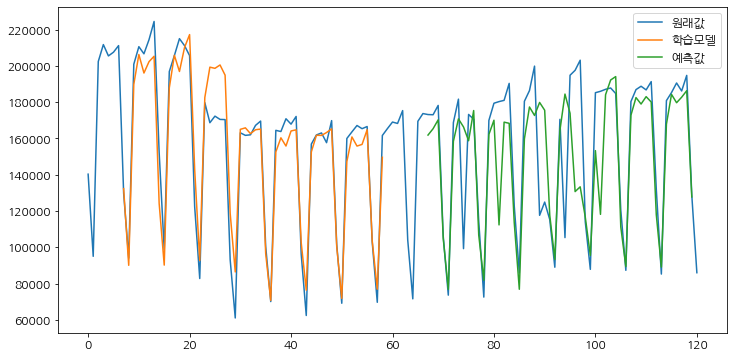

In [165]:
plt.figure(figsize=(12, 6))

plt.plot(scaler.inverse_transform(dataset), label = '원래값')
plt.plot(trainPredictPlot, label = '학습모델')
plt.plot(testPredictPlot, label = '예측값')
plt.legend(loc = 'best')